![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [49]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

In [50]:
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [51]:
# netflix df columns data types
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [52]:
# filtering the data from the tv shows 
netflix_subset = netflix_df[netflix_df['type'] != 'TV Show']
netflix_subset['type'].unique()

array(['Movie'], dtype=object)

In [53]:
# keeping "title", "country", "genre", "release_year", "duration" in a dataframe called netflix_movies
columns = ["title", "country", "genre", "release_year", "duration"]
netflix_movies = netflix_subset[columns]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [54]:
# Filtering netflix_movies to find the movies that are shorter than 60 minutes, saving the resulting DataFrame as short_movies.
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies['duration'].max()

59

In [55]:
netflix_movies['genre'].unique()

array(['Dramas', 'Horror Movies', 'Action', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Uncategorized',
       'International Movies', 'Sci-Fi', 'Children', 'Classic Movies',
       'Thrillers', 'Stand-Up', 'Anime Features', 'Music', 'Cult Movies',
       'Romantic Movies', 'LGBTQ Movies'], dtype=object)

In [56]:
colors = []

for i in netflix_movies['genre']:
    if i == "Children":
        colors.append('Red')
    elif i == "Documentaries":
        colors.append('Green')
    elif i ==  "Stand-Up":
        colors.append('Blue')
    else:
        colors.append('Yellow')

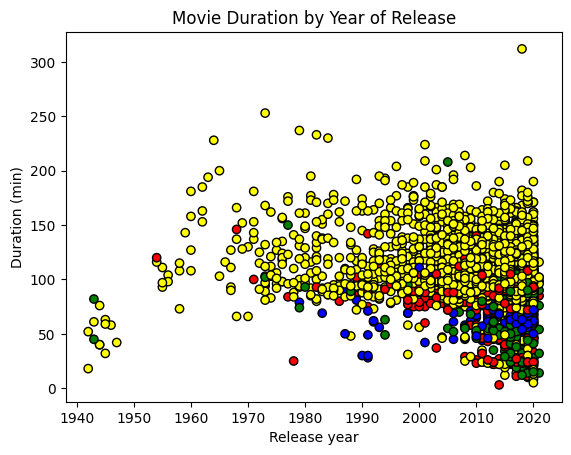

In [57]:
fig, ax = plt.subplots()
scatter = ax.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors, edgecolors='black')
ax.set_xlabel('Release year')
ax.set_ylabel('Duration (min)')
ax.set_title('Movie Duration by Year of Release')
plt.show()

In [58]:
#  "Are we certain that movies are getting shorter?"
answer = "maybe"